In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel


In [2]:
train_data=pd.read_csv('C:/Users/user/Desktop/pythonfiles/train_data1_loan_loan.csv')
train_data.head()

# LOADING THE TRAIN DATA

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Gender_Missing,Married_Missing,...,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_Missing,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,0,0.072991,-0.554487,-0.211241,0.273231,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,Y
1,1,-0.134412,-0.038732,-0.211241,0.273231,1,0,1,0,0,...,1,1,0,0,1,0,1,0,0,N
2,0,-0.393747,-0.554487,-0.948996,0.273231,1,0,1,0,0,...,1,1,0,0,0,1,0,0,1,Y
3,0,-0.462062,0.251980,-0.306435,0.273231,1,0,1,0,0,...,1,0,1,0,1,0,0,0,1,Y
4,0,0.097728,-0.554487,-0.056551,0.273231,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,Y


In [3]:
test_data=pd.read_csv('C:/Users/user/Desktop/pythonfiles/test_data1_loan_loan.csv')
test_data.head()

#  LOADING THE TEST DATA

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Gender_Missing,Married_Missing,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_Missing,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0.051857,-0.554487,-0.425428,0.273231,1.0,0,1,0,0,0,1,1,0,0,1,0,0,0,1
1,1,-0.381297,-0.041468,-0.235040,0.273231,1.0,0,1,0,0,0,1,1,0,0,1,0,0,0,1
2,2,-0.066097,0.061136,0.740701,0.273231,1.0,0,1,0,0,0,1,1,0,0,1,0,0,0,1
3,2,-0.501872,0.316278,-0.544421,0.273231,1.0,0,1,0,0,0,1,1,0,0,1,0,0,0,1
4,0,-0.348532,-0.554487,-0.806205,0.273231,1.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 21 columns):
Dependents                 614 non-null int64
ApplicantIncome            614 non-null float64
CoapplicantIncome          614 non-null float64
LoanAmount                 614 non-null float64
Loan_Amount_Term           614 non-null float64
Credit_History             614 non-null int64
Gender_Female              614 non-null int64
Gender_Male                614 non-null int64
Gender_Missing             614 non-null int64
Married_Missing            614 non-null int64
Married_No                 614 non-null int64
Married_Yes                614 non-null int64
Education_Graduate         614 non-null int64
Education_Not Graduate     614 non-null int64
Self_Employed_Missing      614 non-null int64
Self_Employed_No           614 non-null int64
Self_Employed_Yes          614 non-null int64
Property_Area_Rural        614 non-null int64
Property_Area_Semiurban    614 non-null int64
Property_Area

In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 20 columns):
Dependents                 367 non-null int64
ApplicantIncome            367 non-null float64
CoapplicantIncome          367 non-null float64
LoanAmount                 367 non-null float64
Loan_Amount_Term           367 non-null float64
Credit_History             367 non-null float64
Gender_Female              367 non-null int64
Gender_Male                367 non-null int64
Gender_Missing             367 non-null int64
Married_Missing            367 non-null int64
Married_No                 367 non-null int64
Married_Yes                367 non-null int64
Education_Graduate         367 non-null int64
Education_Not Graduate     367 non-null int64
Self_Employed_Missing      367 non-null int64
Self_Employed_No           367 non-null int64
Self_Employed_Yes          367 non-null int64
Property_Area_Rural        367 non-null int64
Property_Area_Semiurban    367 non-null int64
Property_Ar

In [5]:
# CHANGING THE TARGET NAMES TO NUMERICAL VALUES

target_names={'Y':1 ,'N':0}
target=train_data['Loan_Status']
new_train_data=train_data.drop(['Loan_Status'],axis=1)

target=target.map(target_names)


In [6]:
target.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

## FEATURE SELECTION USING LASSO REGRESSION (Regularization technique)

In [8]:
feature_model=SelectFromModel(Lasso(alpha=0.001,random_state=42)) # provinding the hyperparameters for lasso

# larger the alpha value , most of the feature's coefficients becomes zero
feature_model.fit(new_train_data,target)

SelectFromModel(estimator=Lasso(alpha=0.001, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=42,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [9]:
feature_selected=new_train_data.columns[(feature_model.get_support())]

feature_selected # printing the features selected

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_No',
       'Education_Graduate', 'Self_Employed_Missing', 'Self_Employed_No',
       'Property_Area_Rural', 'Property_Area_Semiurban'],
      dtype='object')

In [10]:
xtrain=new_train_data[feature_selected]
xtrain.head() # filtering out dataframe with selected features only features ( this is the new train set)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_No,Education_Graduate,Self_Employed_Missing,Self_Employed_No,Property_Area_Rural,Property_Area_Semiurban
0,0,0.072991,-0.554487,-0.211241,0.273231,1,1,1,1,0,1,0,0
1,1,-0.134412,-0.038732,-0.211241,0.273231,1,1,0,1,0,1,1,0
2,0,-0.393747,-0.554487,-0.948996,0.273231,1,1,0,1,0,0,0,0
3,0,-0.462062,0.251980,-0.306435,0.273231,1,1,0,0,0,1,0,0
4,0,0.097728,-0.554487,-0.056551,0.273231,1,1,1,1,0,1,0,0


## LOGISTIC REGRESSION MODELLING

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test=train_test_split(xtrain,target,random_state=0,test_size=0.20) # splitting the train set into train and test data

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
logic_reg=LogisticRegression()
logic_reg.fit(X_train,y_train)
y_pred=logic_reg.predict(X_test) # Applying logistic regression on the training set and predicting the values of splitted test data


In [15]:
# CHECKING THE ACCURACY SCORE BETWEEN THE ACTUAL TEST DATA DEPENDENT VALUE AND PREDICTED TEST DATA DEPENDENT VALUE

from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

# 83.73% ACCURACY SCORE  WHICH IS A GOOD ONE

0.8373983739837398

In [16]:
# FORMING CONFUSION MATRIX FOR THE SAME 



from sklearn.metrics import confusion_matrix

cm=(confusion_matrix(y_test,y_pred))

cmdf=pd.DataFrame

cm

array([[15, 18],
       [ 2, 88]], dtype=int64)

In [17]:
# CALCULATING THE PRECSION SCORE(Precision is the ability of a classifier not to label an instance positive that is actually negative)


from sklearn.metrics import precision_score
precision_score(y_test,y_pred)

# PRECISION SCORE OF 83.01% IS A GOOD ONE

0.8301886792452831

In [18]:
# RECALL SCORE(Recall is the ability of a classifier to find all positive instances)


from sklearn.metrics import recall_score
recall_score(y_test,y_pred)

# RECALL SCORE OF 97.77 % 

0.9777777777777777

In [20]:
# F1 SCORE () WEIGHTED HARMONIC MEAN OF PRECISION AND RECALL SCORE)


from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

# F1 SCORE (MEASURE OF TEST'S ACCURACY ) OF 89.79% IS A GOOD ONE

0.8979591836734695

In [42]:
# CLASSIFICATION REPORT (representation of the main classification metrics on a per-class basis)


from sklearn.metrics import classification_report

print("The classification report is as follows...\n")
print(classification_report(y_test, y_pred))

The classification report is as follows...

              precision    recall  f1-score   support

           0       0.88      0.45      0.60        33
           1       0.83      0.98      0.90        90

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123



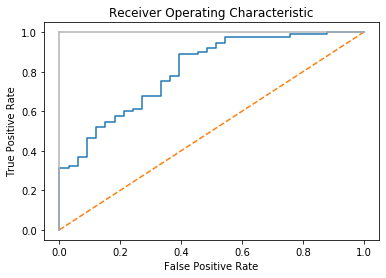

In [21]:
# AUC-ROC CURVE( PROBABILITY CURVE) DETERMINES THE MODEL'S DISTINGUISHING POWER BETWEEN THE CLASSES




from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities
target_probabilities = logic_reg.predict_proba(X_test)[:,1]

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,target_probabilities)

# Plot ROC curve
%matplotlib inline
import matplotlib.pyplot as plt

plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [22]:
#An excellent model has AUC near to the 1 which means it has good measure of separability.


roc_auc_score(y_test,target_probabilities)

# AUC-ROC SCORE OF 80.47% IS A DECENT ONE AND OUR MODEL HAS MADE A DECENT PREDICTION

0.8047138047138047

In [23]:
from sklearn.model_selection import KFold, cross_val_score, validation_curve
from sklearn import linear_model

logreg = linear_model.LogisticRegression()

kfold = KFold(n_splits=10,random_state=7)

cv_results = cross_val_score(logreg, X_train,y_train, cv=kfold)
print (cv_results.mean()*100, "%")

80.64897959183673 %


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


## PREDICTING THE VALUES OF ACTUAL TEST DATA

In [26]:
test1_data=test_data[ feature_selected]
test1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 13 columns):
Dependents                 367 non-null int64
ApplicantIncome            367 non-null float64
CoapplicantIncome          367 non-null float64
LoanAmount                 367 non-null float64
Loan_Amount_Term           367 non-null float64
Credit_History             367 non-null float64
Gender_Male                367 non-null int64
Married_No                 367 non-null int64
Education_Graduate         367 non-null int64
Self_Employed_Missing      367 non-null int64
Self_Employed_No           367 non-null int64
Property_Area_Rural        367 non-null int64
Property_Area_Semiurban    367 non-null int64
dtypes: float64(5), int64(8)
memory usage: 37.4 KB


In [29]:
y_testdata_pred=logic_reg.predict(test1_data)

y_testdata_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [30]:
data=test_data.copy()

data['pred values']=y_testdata_pred

data.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Gender_Missing,Married_Missing,...,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_Missing,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,pred values
0,0,0.051857,-0.554487,-0.425428,0.273231,1.0,0,1,0,0,...,1,1,0,0,1,0,0,0,1,1
1,1,-0.381297,-0.041468,-0.235040,0.273231,1.0,0,1,0,0,...,1,1,0,0,1,0,0,0,1,1
2,2,-0.066097,0.061136,0.740701,0.273231,1.0,0,1,0,0,...,1,1,0,0,1,0,0,0,1,1
3,2,-0.501872,0.316278,-0.544421,0.273231,1.0,0,1,0,0,...,1,1,0,0,1,0,0,0,1,1
4,0,-0.348532,-0.554487,-0.806205,0.273231,1.0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,1


In [31]:
data.to_csv(r'C:\Users\user\Desktop\pythonfiles\FINAL_LOAN_PREDICTED.csv' , index=False)

## DECISION TREE CLSSIFIER ( NOT USED FOR FINAL PREDICTION AS THE ACCURACY SCORES WERE NOT GOOD)

In [51]:
new_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 20 columns):
Dependents                 614 non-null int64
ApplicantIncome            614 non-null float64
CoapplicantIncome          614 non-null float64
LoanAmount                 614 non-null float64
Loan_Amount_Term           614 non-null float64
Credit_History             614 non-null int64
Gender_Female              614 non-null int64
Gender_Male                614 non-null int64
Gender_Missing             614 non-null int64
Married_Missing            614 non-null int64
Married_No                 614 non-null int64
Married_Yes                614 non-null int64
Education_Graduate         614 non-null int64
Education_Not Graduate     614 non-null int64
Self_Employed_Missing      614 non-null int64
Self_Employed_No           614 non-null int64
Self_Employed_Yes          614 non-null int64
Property_Area_Rural        614 non-null int64
Property_Area_Semiurban    614 non-null int64
Property_Area

In [52]:
target.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [53]:
from sklearn.tree import DecisionTreeClassifier



In [58]:
X_train,X_test,y_train,y_test=train_test_split(new_train_data,target,random_state=0,test_size=0.20)



In [59]:
dtc=DecisionTreeClassifier(random_state=0)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [60]:
y_pred1=dtc.predict(X_test)

In [61]:
accuracy_score(y_test,y_pred1)

0.6991869918699187

In [62]:
confusion_matrix(y_test,y_pred1)

array([[18, 15],
       [22, 68]], dtype=int64)

In [63]:
precision_score(y_test,y_pred1)

0.8192771084337349

In [64]:
recall_score(y_test,y_pred1)

0.7555555555555555

In [65]:
f1_score(y_test,y_pred1)

0.7861271676300577

In [66]:
from sklearn.metrics import classification_report

print("The classification report is as follows...\n")
print(classification_report(y_test, y_pred1))

The classification report is as follows...

              precision    recall  f1-score   support

           0       0.45      0.55      0.49        33
           1       0.82      0.76      0.79        90

    accuracy                           0.70       123
   macro avg       0.63      0.65      0.64       123
weighted avg       0.72      0.70      0.71       123



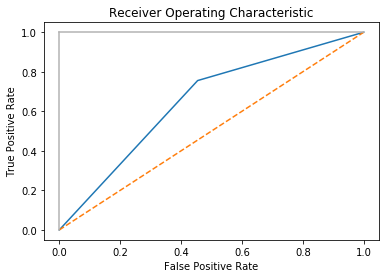

In [68]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities
targeted_probabilities = dtc.predict_proba(X_test)[:,1]

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,target_probabilities)

# Plot ROC curve
%matplotlib inline
import matplotlib.pyplot as plt

plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [69]:
roc_auc_score(y_test,targeted_probabilities)

0.6505050505050505